In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
titanic = sns.load_dataset('titanic')
class_name = 'default'
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
titanic = titanic.drop(['fare','who','embarked','alone'],axis='columns')
titanic

,survived,pclass,sex,age,sibsp,parch,class,adult_male,deck,embark_town,alive
0,0,3,male,22.0,1,0,Third,True,NaN,Southampton,no
1,1,1,female,38.0,1,0,First,False,C,Cherbourg,yes
2,1,3,female,26.0,0,0,Third,False,NaN,Southampton,yes
3,1,1,female,35.0,1,0,First,False,C,Southampton,yes
4,0,3,male,35.0,0,0,Third,True,NaN,Southampton,no
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,Second,True,NaN,Southampton,no
887,1,1,female,19.0,0,0,First,False,B,Southampton,yes
888,0,3,female,NaN,1,2,Third,False,NaN,Southampton,no
889,1,1,male,26.0,0,0,First,True,C,Cherbourg,yes


In [4]:
#dropping the na values

titanic=titanic.dropna()
titanic

,survived,pclass,sex,age,sibsp,parch,class,adult_male,deck,embark_town,alive
1,1,1,female,38.0,1,0,First,False,C,Cherbourg,yes
3,1,1,female,35.0,1,0,First,False,C,Southampton,yes
6,0,1,male,54.0,0,0,First,True,E,Southampton,no
10,1,3,female,4.0,1,1,Third,False,G,Southampton,yes
11,1,1,female,58.0,0,0,First,False,C,Southampton,yes
...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,First,False,D,Southampton,yes
872,0,1,male,33.0,0,0,First,True,B,Southampton,no
879,1,1,female,56.0,0,1,First,False,C,Cherbourg,yes
887,1,1,female,19.0,0,0,First,False,B,Southampton,yes


In [5]:
#converting to numerical instead of categorical

titanic['sex']=titanic['sex'].astype('category')
titanic['sex']=titanic['sex'].cat.codes

titanic['class']=titanic['class'].astype('category')
titanic['class']=titanic['class'].cat.codes

titanic['adult_male']=titanic['adult_male'].astype('category')
titanic['adult_male']=titanic['adult_male'].cat.codes

titanic['deck']=titanic['deck'].astype('category')
titanic['deck']=titanic['deck'].cat.codes

titanic['embark_town']=titanic['embark_town'].astype('category')
titanic['embark_town']=titanic['embark_town'].cat.codes

titanic['alive']=titanic['alive'].astype('category')
titanic['alive']=titanic['alive'].cat.codes



titanic

C:\Users\maria\AppData\Local\Temp\ipykernel_12588\1848737974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['sex']=titanic['sex'].astype('category')
C:\Users\maria\AppData\Local\Temp\ipykernel_12588\1848737974.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['sex']=titanic['sex'].cat.codes
C:\Users\maria\AppData\Local\Temp\ipykernel_12588\1848737974.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,survived,pclass,sex,age,sibsp,parch,class,adult_male,deck,embark_town,alive
1,1,1,0,38.0,1,0,0,0,2,0,1
3,1,1,0,35.0,1,0,0,0,2,2,1
6,0,1,1,54.0,0,0,0,1,4,2,0
10,1,3,0,4.0,1,1,2,0,6,2,1
11,1,1,0,58.0,0,0,0,0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,0,47.0,1,1,0,0,3,2,1
872,0,1,1,33.0,0,0,0,1,1,2,0
879,1,1,0,56.0,0,1,0,0,2,0,1
887,1,1,0,19.0,0,0,0,0,1,2,1


In [6]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,class,adult_male,deck,embark_town,alive
1,1,1,0,38.0,1,0,0,0,2,0,1
3,1,1,0,35.0,1,0,0,0,2,2,1
6,0,1,1,54.0,0,0,0,1,4,2,0
10,1,3,0,4.0,1,1,2,0,6,2,1
11,1,1,0,58.0,0,0,0,0,2,2,1


In [7]:
#Seperating into train and test parametres

X= titanic.values[:,1:11]
y= titanic.values[:, 10]  #target is in 11 column

X_train, X_test, y_train, y_test= train_test_split(X , y, test_size=0.25, random_state=100)

#fucntion to perform training with entropy

entropy= DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=3, min_samples_leaf=5)
entropy.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [8]:
y_pred= entropy.predict(X_test)
y_pred

array([1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1.])

In [9]:
#checking for accuracy

print('Accuracy is', accuracy_score(y_test,y_pred)*100)

Accuracy is 100.0


[Text(0.5, 0.75, 'X[9] <= 0.5\nentropy = 0.892\nsamples = 136\nvalue = [42, 94]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 94\nvalue = [0, 94]')]

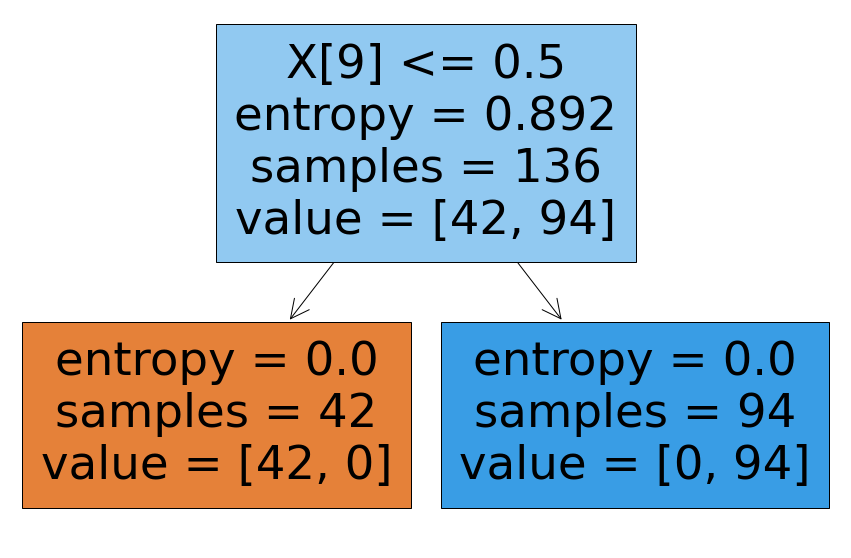

In [10]:
plt.figure(figsize=(15,10))
tree.plot_tree(entropy,filled=True)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 1.00000


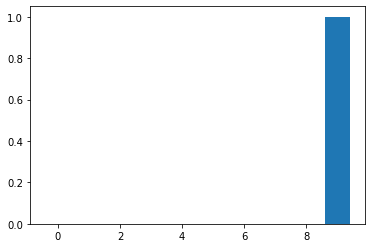

In [11]:
# Calculating  gini impurity for the attiributes

# features = ['survived','pclass','sex','age','sibsp','parch','class','adult_male','deck','embark_town']
importance = entropy.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()